> # Essential Math for AI 
> # Chapter 3: Fitting Data To Functions
___

## Import the required libraries

In [1]:
# We will import more libraries later in the notebook as we need them. These libraries are standard.

import numpy as np
import seaborn
import matplotlib.pyplot as plt

# A fitting function that follows the noise in the data vs a fitting function that is more regular

Let's generate our data points $(x_i,y_i)$ using a Gaussian function (nonlinear) with mean $\mu$ and standard deviation $\sigma$ plus noise (the noise is sampled from the uniform distribution): 
$$y=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}+noise.$$

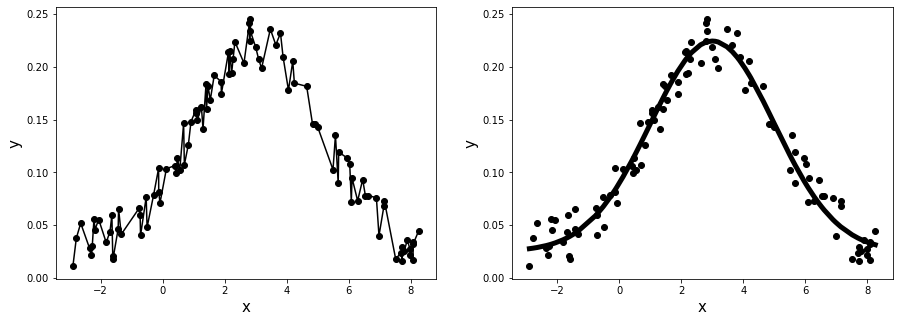

In [2]:
# We generate our data points using a Gaussian function plus noise. This is simulated data. 
mu=3
sigma=2

# Generate the (x,y) of the data points
x=-3+12*np.random.rand(100,1)
# sort the above randomly generated points
xx=np.sort(x, axis=None)
y=np.exp(-0.5*(xx-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))+0.05*np.random.rand(100,)

# Regular fitting function formula
z=0.025+np.exp(-0.5*(xx-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))

# Plotting
fig, subs = plt.subplots(1,2,figsize=(15,5))

# First fitting function linearly interpolates the data points in the first subplot
subs[0].plot(xx, y, 'ko', xx, y, 'k-')
subs[0].set_xlabel('x',fontsize=15)
subs[0].set_ylabel('y',fontsize=15)

# Plot the data points and the regular fitting function in the second subplot
subs[1].plot(xx,y,'ko')
subs[1].plot(xx,z,'k', linewidth=5)
subs[1].set_xlabel('x',fontsize=15)
subs[1].set_ylabel('y',fontsize=15)

# Save the figure
plt.savefig("Fig_noise_fit_regular_fit.png")

# Plotting the functions $|x|$ and $|x|^2$

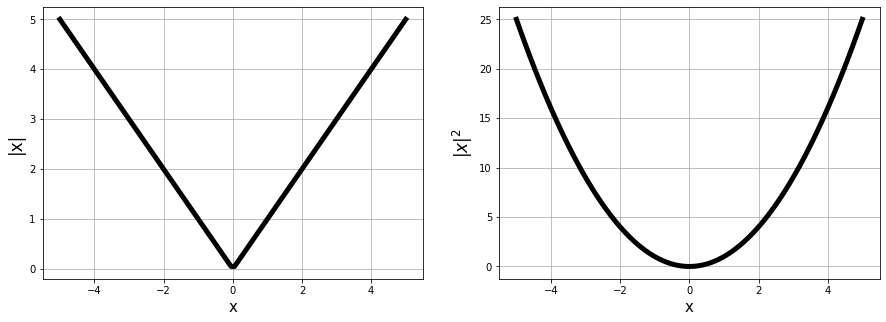

In [3]:
x=np.linspace(-5,5,100)
y_abs=np.abs(x)
y_square=x**2
fig, subs = plt.subplots(1,2,figsize=(15,5))
subs[0].grid()
subs[0].plot(x,y_abs,'k',linewidth=5)
subs[0].set_xlabel('x',fontsize=15)
subs[0].set_ylabel('|x|',fontsize=17)
subs[1].grid()
subs[1].plot(x,y_square,'k',linewidth=5)
subs[1].set_xlabel('x',fontsize=15)
subs[1].set_ylabel('$|x|^2$',fontsize=17)

plt.savefig("Fig_abs_x_square_x.png")

## Functions with singularities

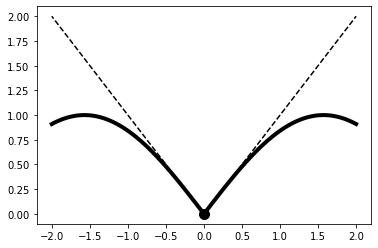

In [97]:
x=np.linspace(-2,2,120)
y=np.abs(np.sin(x))
plt.plot(x,y,'k',linewidth=4)

x1=np.linspace(0,2,60)
y1=x1
plt.plot(x1,y1,'k--')
plt.plot(-x1,y1,'k--')
plt.plot(0,0,'ko',markersize=10)

plt.savefig('Fig_singularity_tangents')

## Solving $f(\omega)=0$ where f is nonlinear is usually very difficult

Find $\omega$ such that $$0.002\sin(\omega)-2\omega^2+e^{\omega}=0$$

On the graph we can locate the roots approximately.

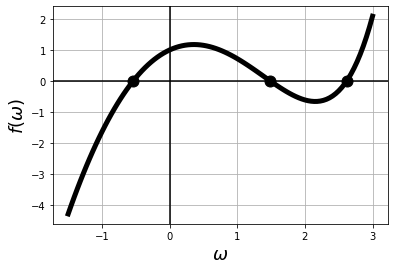

In [109]:
w=np.linspace(-1.5,3,100)
y=0.002*np.sin(w)-2*w**2+np.exp(w)
plt.plot(w,y,'k',linewidth=5)
plt.grid()
plt.xlabel('$\omega$',fontsize=18)
plt.ylabel('$f(\omega)$',fontsize=18)
plt.axhline(y=0, color='k') # shows the x-axis
plt.axvline(x=0, color='k') # shows the y-axis

# highlight the approximate roots
plt.plot(1.489,0,'k.',markersize=22)
plt.plot(-0.539,0,'k.',markersize=22)
plt.plot(2.618,0,'k.',markersize=22)

plt.savefig("Fig_roots_f_nonlinear.png")

# Locating the minimizer of the function $f(\omega)=3+(0.5\omega-2)^2$ on the interval $[-1,6]$.

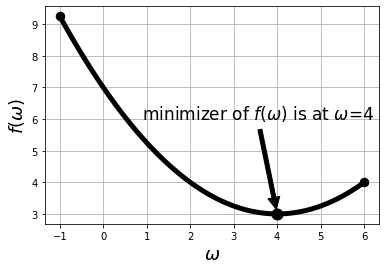

In [4]:
w=np.linspace(-1,6,100)
y=3+(0.5*w-2)**2
plt.plot(w,y,'k',linewidth=5)
plt.grid()
plt.xlabel('$\omega$',fontsize=18)
plt.ylabel('$f(\omega)$',fontsize=18)
# highlight the minimizing point
plt.plot(4,3,'k.',markersize=22)
# highlight the boundary points
plt.plot(-1,9.25,'k.',markersize=17)
plt.plot(6,4,'k.',markersize=17)

# annotate the graph
plt.annotate('minimizer of $f(\omega)$ is at $\omega$=4', xy=(4, 3), xytext=(0.9,6),
             arrowprops=dict(facecolor='k', shrink=0.05),fontsize='17')

plt.savefig("Fig_minimize_f.png")

# Plotting the logistic function $\sigma(s)=\frac{1}{1+e^{-s}}$

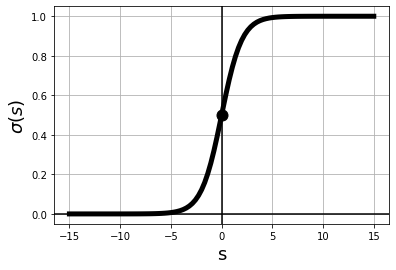

In [5]:
s=np.linspace(-15,15,100)
sigma=1/(1+np.exp(-s))
plt.plot(s,sigma,'k',linewidth=5)
plt.grid()
plt.xlabel('s',fontsize=18)
plt.ylabel('$\sigma(s)$',fontsize=18)
plt.axhline(y=0, color='k') # shows the x-axis
plt.axvline(x=0, color='k') # shows the y-axis

plt.plot(0,0.5,'k.',markersize=22)

plt.savefig("Fig_logistic.png")

# Plotting the functions $f(s)=-\log(s)$ and $g(s)=-\log(1-s)$ over the interval (0,1). These functions appear in the cross entropy loss function, popular for classification tasks.

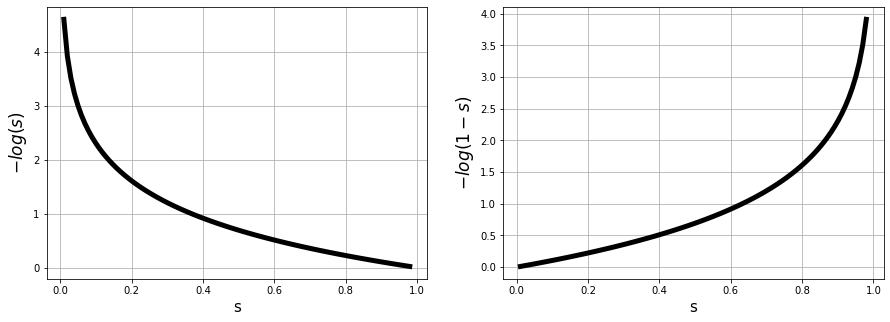

In [6]:
s=np.linspace(0.01,0.98,100)
f=-np.log(s)
g=-np.log(1-s)

fig, subs = plt.subplots(1,2,figsize=(15,5))
subs[0].grid()
subs[0].plot(s,f,'k',linewidth=5)
subs[0].set_xlabel('s',fontsize=15)
subs[0].set_ylabel('$-log(s)$',fontsize=17)
subs[1].grid()
subs[1].plot(s,g,'k',linewidth=5)
subs[1].set_xlabel('s',fontsize=15)
subs[1].set_ylabel('$-log(1-s)$',fontsize=17)

plt.savefig("Fig_log_s_log_1_s.png")

## Landscape of a convex function

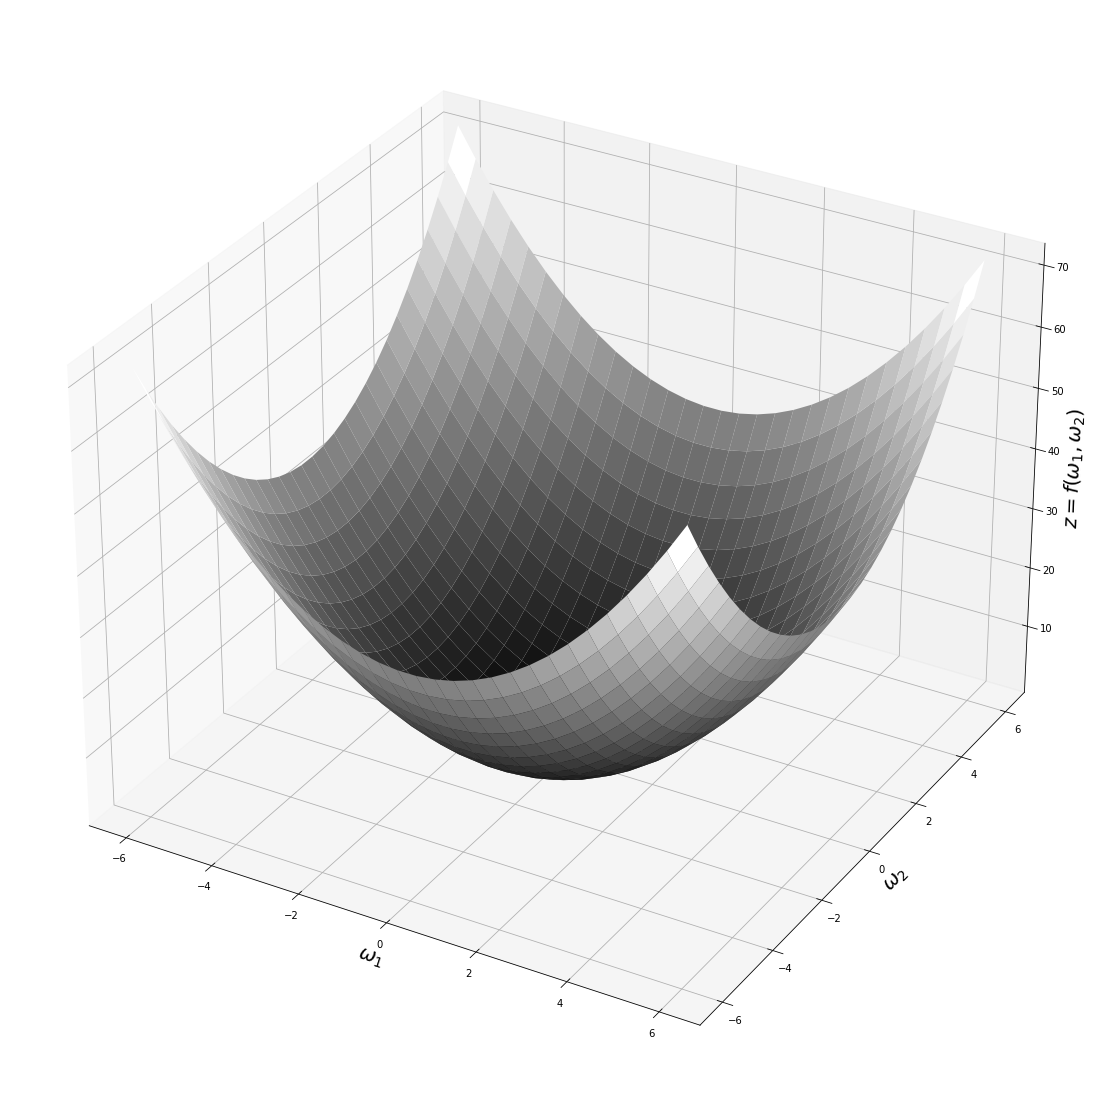

In [137]:
# formula for the function of two variables that we want to plot
def f(x,y):
    return x**2+y**2
# create the x and y grid points using numpy.linspace
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

# Now plot Z 
picture=plt.figure(figsize=(20,20))
picture=plt.axes(projection='3d')
#picture.contour3D(X,Y,Z,30) #you can specify the color map using the argument cmap=
picture.plot_surface(X, Y, Z, cmap='gist_gray')
# set labels for axes
picture.set_xlabel('$\omega_1$',fontsize=20)
picture.set_ylabel('$\omega_2$',fontsize=20)
picture.set_zlabel('$z=f(\omega_1,\omega_2)$',fontsize=20)
# set image title
#picture.set_title('Landscape of a Convex Function',fontsize=13)
plt.savefig("Fig_convex_landscape.png")

## Landscape of a non-convex function has peaks and valleys

$$f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10\left(\frac{x}{5}-x^3-y^5\right)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2 - y^2}$$

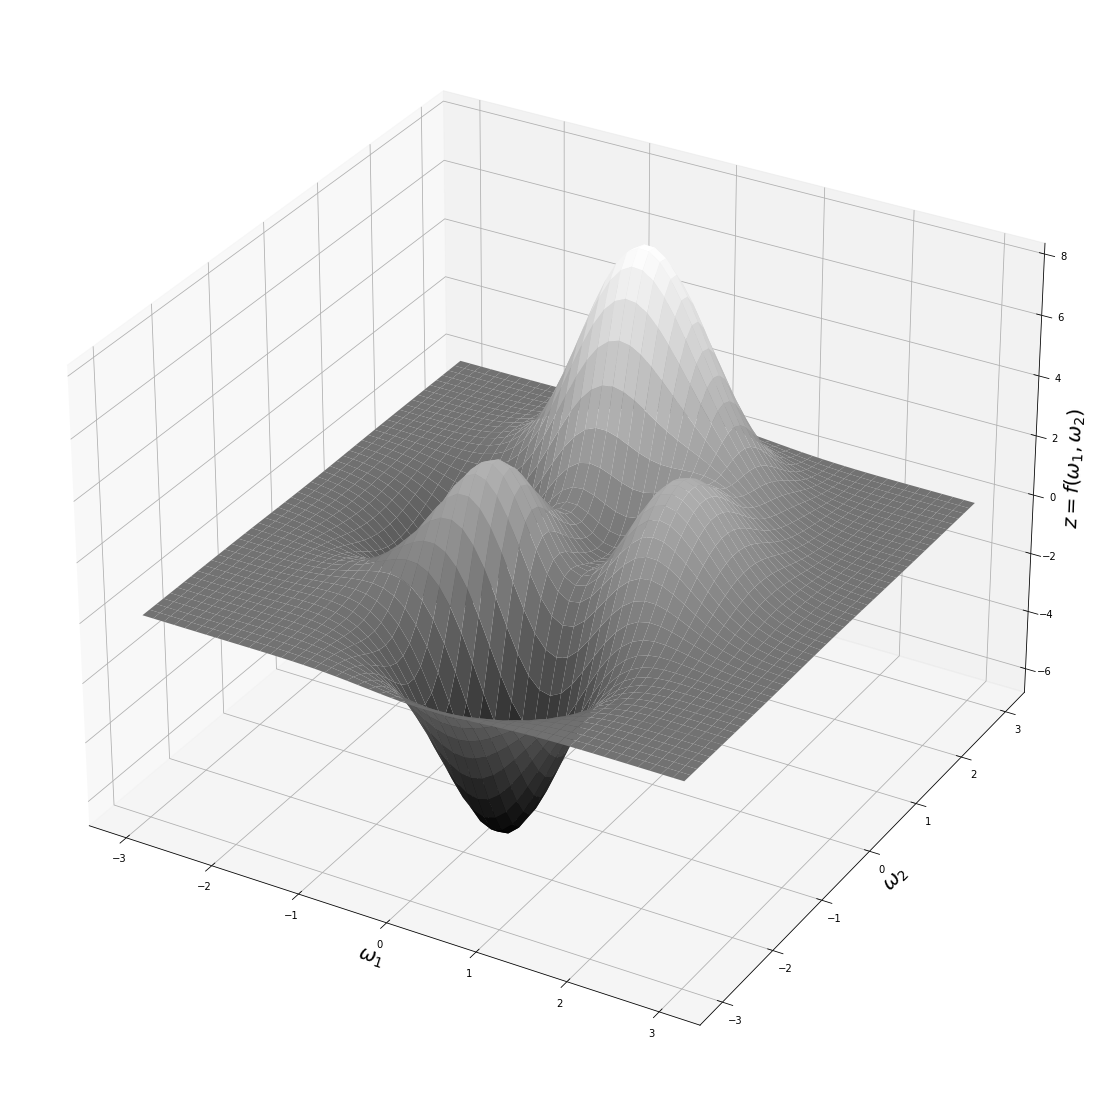

In [138]:
# formula for the function of two variables that we want to plot
def f(x,y):
    return 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-np.exp(-(x+1)**2-y**2)/3
# create the x and y grid points using numpy.linspace
x=np.linspace(-3,3,50)
y=np.linspace(-3,3,50)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

# Now plot Z 
picture=plt.figure(figsize=(20,20))
picture=plt.axes(projection='3d')
#picture.contour3D(X,Y,Z,30) #you can specify the color map using the argument cmap=
picture.plot_surface(X, Y, Z, cmap='gist_gray')
# set labels for axes
picture.set_xlabel('$\omega_1$',fontsize=20)
picture.set_ylabel('$\omega_2$',fontsize=20)
picture.set_zlabel('$z=f(\omega_1,\omega_2)$',fontsize=20)
# set image title
#picture.set_title('Landscape of a Non-Convex Function',fontsize=13)
plt.savefig("Fig_nonconvex_landscape.png")

# Predicting the weight of a fish: Data set is the [fish market data set ](https://www.kaggle.com/aungpyaeap/fish-market) from Kaggle.

1. We want to make a directory named Data_Sets containing our data sets in our workspace.
2. We want to download the fish market data set from the internet url: https://www.kaggle.com/aungpyaeap/fish-market into the directory that we created.
3. Most of the time this downloads a zip file so we need to unzip it.
4. Then we want to read the data that we downloaded into a pandas data frame so we can do analytics on it.

For this we need the os library, the request module from the urllib library, the zipfile library, and the pandas library.

In [7]:
# Make the directory containing our data sets.
# You can specify any path on your machine.
import os
my_path = "Data_Sets"
os.makedirs(my_path,exist_ok=True) #do not raise an error if the directory already exists 
data_file_path=os.path.join(my_path,"fish_market.zip")
print(data_file_path)

Data_Sets/fish_market.zip


Little code to retrieve the data from the kaggle url and save it into where you specify the data file path

In [8]:
import urllib.request
url_data = 'https://www.kaggle.com/aungpyaeap/fish-market/download/'
urllib.request.urlretrieve(url_data,data_file_path)

('Data_Sets/fish_market.zip', <http.client.HTTPMessage at 0x7faa8b284ee0>)

In [9]:
# use the zipfile library to open the zip file
#Extract the zip files
from zipfile import ZipFile
zip_file = 'Data_Sets/archive.zip'
with ZipFile(zip_file, 'r') as zf:
   #display the files inside the zip
   zf.printdir()
   #Extracting the files from zip file
   zf.extractall(path='Data_Sets')
   print('Zip Extraction Completed')

File Name                                             Modified             Size
Fish.csv                                       2019-10-25 17:20:04         6022
Zip Extraction Completed


Now the data set is extracted and is set in our Data_Sets directory as a csv file, we can read it into a pandas data frame.

In [10]:
import pandas as pd

fish_market_df=pd.read_csv('Data_Sets/Fish.csv')

In [11]:
# Display the first five rows of the data set
fish_market_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
# Save the above data frame head as an image to use in the book chapter 
# I had to install the library dataframe_image using: pip install dataframe-image
df=fish_market_df.head()
import dataframe_image as dfi
dfi.export(df,'Fig_fish_data.png')

# Exploring the fish market data set

In [13]:
# get the overall info and statistics for each feature 

fish_market_df.info()
fish_market_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [14]:
# The species feature is categorical so let's see how many categories we have and how many of each category
fish_market_df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

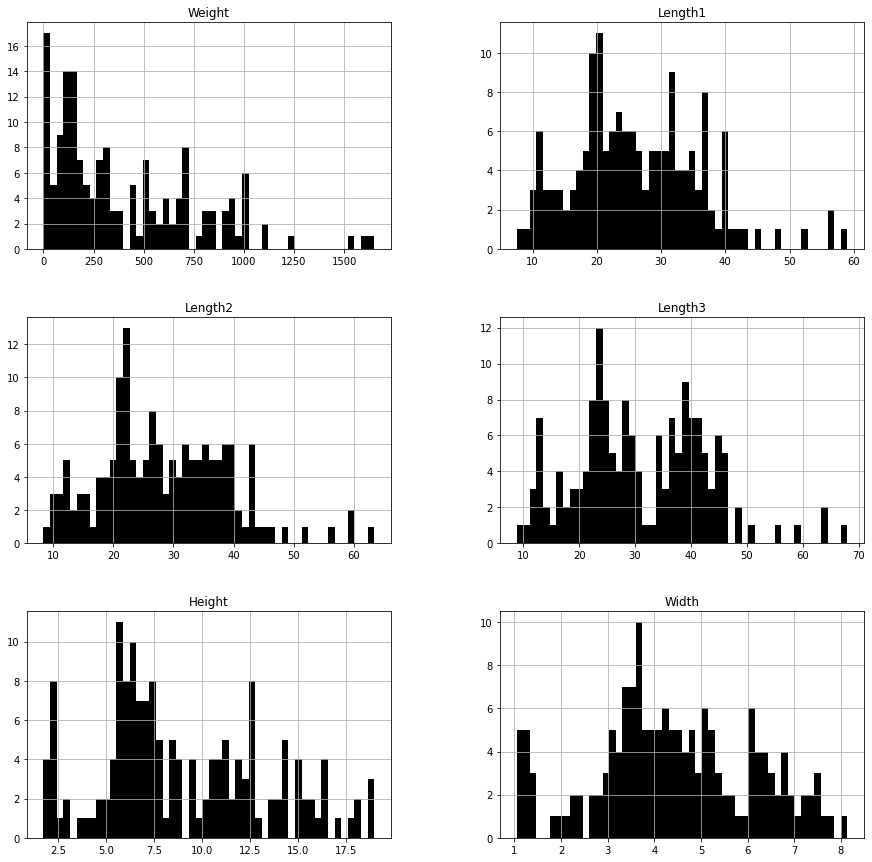

In [15]:
# Plot a histogram for each feature. Check out their emperical distributions.
fish_market_df.hist(bins=50, figsize=(15,15), color='black')

# Split the original data set into a training and test subsets (we'll use scikit-learn library)

We will do stratified sampling based on the Species feature so that our test set is representative of the actual proportions in the data. Otherwise we have sampling error and our test set does not represent our data well. 

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

data_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=30)

for train_index, test_index in data_split.split(fish_market_df,fish_market_df['Species']):
    strat_train_set=fish_market_df.loc[train_index]
    strat_test_set=fish_market_df.loc[test_index]

# Let's check the proportions of fish species that we got in our test subset
# and compare it to the proportions in the original data subset in the next input cell

print('Proportions of fish species in the test data subset:')
strat_test_set['Species'].value_counts()/len(strat_test_set)

Proportions of fish species in the test data subset:


Perch        0.34375
Bream        0.21875
Roach        0.12500
Pike         0.12500
Smelt        0.09375
Parkki       0.06250
Whitefish    0.03125
Name: Species, dtype: float64

In [17]:
print('Proportions of fish species in the original data set:')
fish_market_df['Species'].value_counts()/len(fish_market_df)

Proportions of fish species in the original data set:


Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

# Now let's explore the training set. We are looking for any obvious relationships (correlations, etc.) between the features and the target label, which is the Weight feature.

In [18]:
# Let's calculate the correlation between each pairs of features in the training subset

correlation_matrix=strat_train_set.corr()

# Now check the correlation of each length feature with the target feature (Weight of the fish)
correlation_matrix['Weight']

# We observe numbers close to one meaning there is a strong positive linear correlations between the
# length features and the weight.

Weight     1.000000
Length1    0.908678
Length2    0.911888
Length3    0.917883
Height     0.747700
Width      0.896036
Name: Weight, dtype: float64


 The full correlation matrix:

            Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.908678  0.911888  0.917883  0.747700  0.896036
Length1  0.908678  1.000000  0.999493  0.991731  0.637844  0.870414
Length2  0.911888  0.999493  1.000000  0.993869  0.653291  0.877268
Length3  0.917883  0.991731  0.993869  1.000000  0.716450  0.882716
Height   0.747700  0.637844  0.653291  0.716450  1.000000  0.802115
Width    0.896036  0.870414  0.877268  0.882716  0.802115  1.000000


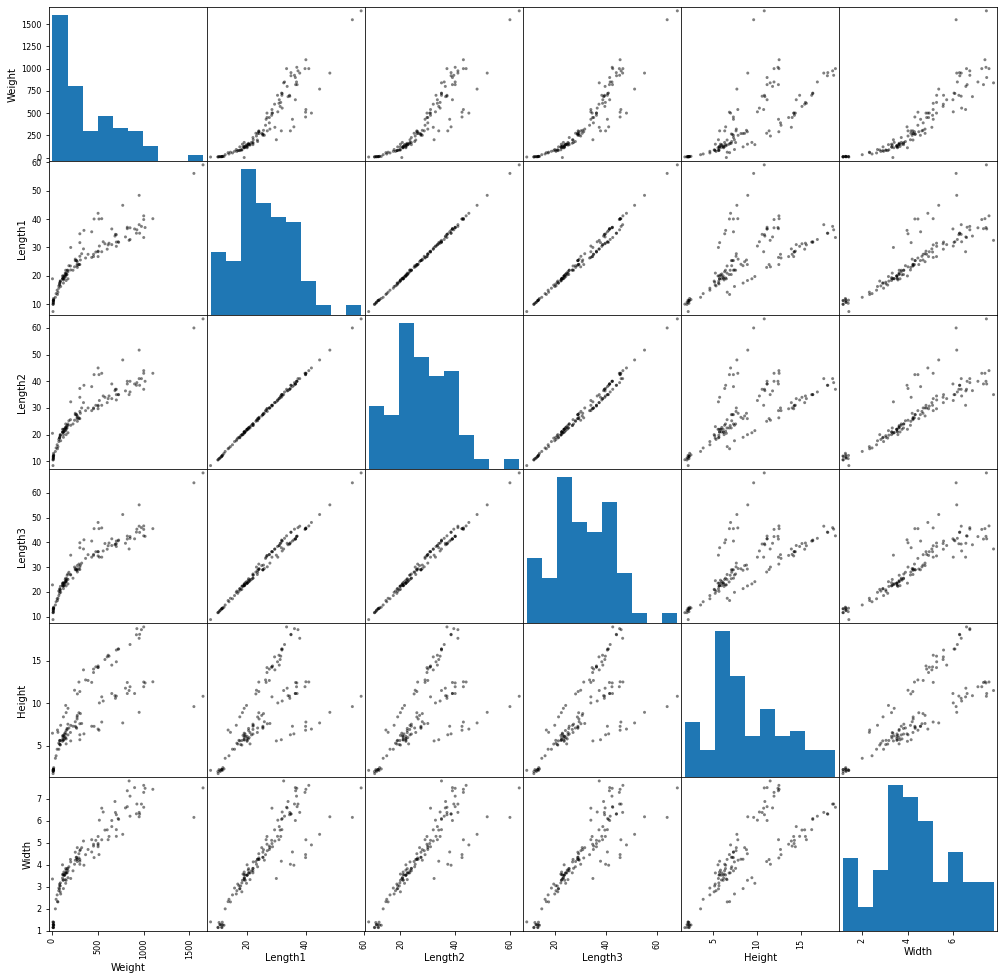

In [113]:
# Let's explore our training set in a different way and plot every feature against all the others and pay
# special attention to the relationship between each feature and the weight feature.

from pandas.plotting import scatter_matrix

scatter_matrix(strat_train_set,figsize=(17,17),color='black')

plt.savefig('Fig_weight_lengths_scatterplots')

print('\n The full correlation matrix:\n\n',correlation_matrix)
dfi.export(correlation_matrix,'Fig_fish_corr_matrix.png')

# Let's try different models on our training data

## 1. Linear regression: Use scikit-learn's linear regression to fit our training data into a linear regression model, and predict the weight feature using the five length features.

In [20]:
from sklearn.linear_model import LinearRegression

# isolate the numerical features and drop the target feature
fish_market_num=strat_train_set.drop({'Species','Weight'}, axis=1)
# isolate the label feature
fish_market_label=strat_train_set['Weight']

model=LinearRegression()
model.fit(fish_market_num,fish_market_label)

# print the omegas
print('\nThe omega values using scikit learn Linear Regression\n\n',model.intercept_,model.coef_)

# Find the linear reression's model mean squared error on the training subset

from sklearn.metrics import mean_squared_error
predicted_weight_training=model.predict(fish_market_num)
mse_train=mean_squared_error(fish_market_label,predicted_weight_training)

print('\nMean_squared_error on the training set=',mse_train)

# find the square root of the mean squared error
root_mean_squared_error_train=np.sqrt(mse_train)
print('\nRoot_mean_squared_error on the training set=',root_mean_squared_error_train)


The omega values using scikit learn Linear Regression

 -475.19929130109716 [ 82.84970118 -28.85952426 -28.50769512  29.82981435  30.97250278]

Mean_squared_error on the training set= 13340.703647147178

Root_mean_squared_error on the training set= 115.50196382376872


# Try the analytical solution instead of the scikit-learn's built in linear regression model

$$\vec{ω}= (X^tX)^{−1}X^t\vec{y}_{true}$$

where $X$ is the matrix containing all training features (the five length features) without the label feature and $\vec{y}_{true}$ is the label feature, and concatenated with a vector of ones in the first column.

After we calculate $\vec{ω}$ we predict the weight using the prediction function:

$$y_{predict} = ω_0 +\omega_1 x_1 +\omega_2x_2 +\omega_3x_3 +\omega_4x_4 +\omega_5x_5$$

In [21]:
X=strat_train_set.drop({'Species','Weight'}, axis=1)
y_true=fish_market_label

# Let's make sure we got the right thing
X.head()

,Length1,Length2,Length3,Height,Width
109,30.5,32.8,34.0,10.0300,6.0180
133,36.0,38.5,41.0,6.3960,3.9770
5,26.8,29.7,34.7,13.6024,4.9274
114,34.5,37.0,39.4,10.8350,6.2646
72,7.5,8.4,8.8,2.1120,1.4080


In [22]:
# Change X from a pandas data frame to numpy array
X_array=X.to_numpy()
y_true_array=y_true.to_numpy()

shape_X=X_array.shape
ones_vec=np.ones((shape_X[0],1))

X_conc=np.concatenate((ones_vec,X_array),axis=1)

Xt=X_conc.T
A=np.linalg.inv(Xt.dot(X_conc))
b=Xt.dot(y_true_array)
# calculate the omegas using the analytical formula
omega=A.dot(b)
print('\nThe omega values using the analytical solution are the same:\n\n',omega)

# using the pseudo inverse
omega_1=(np.linalg.pinv(X_conc)).dot(y_true_array)
print('\nThe omega values using the pseudo inverse are the same:\n\n',omega_1)


The omega values using the analytical solution are the same:

 [-475.1992913    82.84970118  -28.85952426  -28.50769512   29.82981435
   30.97250278]

The omega values using the pseudo inverse are the same:

 [-475.1992913    82.84970118  -28.85952426  -28.50769512   29.82981435
   30.97250278]


In [23]:
# Now make predictions on the entire training data set

Y_predict=X_conc.dot((omega.T))

# Let's measure the mean squared error on the training data set

m=X_array.shape[0]

mse_train_analytical=mean_squared_error(y_true_array,Y_predict)
Loss=((Y_predict-y_true_array).T).dot(Y_predict-y_true_array)/m

print('\nMean_squared_error on the training set (using the analytical formula for the error (loss function))=\n',Loss)
print('\nMean_squared_error on the training set (using scikit learn) is the same=',mse_train_analytical)

# find the square root of the mean squared error
root_mean_squared_error_train_analytical=np.sqrt(mse_train_analytical)
print('Root_mean_squared_error on the training set (using the analytical solution)=',root_mean_squared_error_train_analytical)


Mean_squared_error on the training set (using the analytical formula for the error (loss function))=
 13340.70364714718

Mean_squared_error on the training set (using scikit learn) is the same= 13340.703647147178
Root_mean_squared_error on the training set (using the analytical solution)= 115.50196382376872


> **Note: The mean squared error (even on the training data) is very big but we don't have enough data and we did not use the categorical features (type of the fish) in our model. That would've helped. We leave that for later chapters and bigger data sets. Before we leave this example let's calculate the mean squared error on the test set.** 

In [35]:
# isolate the numerical features and drop the target feature
fish_market_num_test=strat_test_set.drop({'Species','Weight'}, axis=1)
# isolate the label feature
fish_market_label_test=strat_test_set['Weight']

predicted_weight_test=model.predict(fish_market_num_test)
mse_test=mean_squared_error(fish_market_label_test,predicted_weight_test)

print('\nMean_squared_error on the test set=',mse_train)

# find the square root of the mean squared error
root_mean_squared_error_test=np.sqrt(mse_test)
print('\nRoot_mean_squared_error on the test set=',root_mean_squared_error_test)

from sklearn.metrics import r2_score
print('\n$R^2$ score=', r2_score(fish_market_label_test,predicted_weight_test))


Mean_squared_error on the test set= 13340.703647147178

Root_mean_squared_error on the test set= 144.47329547934066

$R^2$ score= 0.8711413402357489


> **Note: The $R^2$ score provides a measure for goodness of fit of the model (there are other statistical metrics for goodness of fit such as residual plot statistical metrics).**

## 2. Regression Decision Tree: Fit a regression tree with three layers to the same Fish Market data set. This one does better on the test subset.

In [110]:
from sklearn.tree import DecisionTreeRegressor

reg_tree_model=DecisionTreeRegressor(max_depth=3,min_samples_split=5)
reg_tree_model.fit(fish_market_num,fish_market_label)
predicted_weight_training_tree=reg_tree_model.predict(fish_market_num)
mse_train_tree=mean_squared_error(fish_market_label,predicted_weight_training_tree)

print('\nMean_squared_error on the training set using Regression Decision Tree=',mse_train_tree)

# find the square root of the mean squared error
root_mean_squared_error_train_tree=np.sqrt(mse_train_tree)
print('\nRoot_mean_squared_error on the training set using Regression Decision Tree=',
      root_mean_squared_error_train_tree)

predicted_weight_test_tree=reg_tree_model.predict(fish_market_num_test)

mse_test_tree=mean_squared_error(fish_market_label_test,predicted_weight_test_tree)
print('\nMean_squared_error on the test set using Regression Tree=',mse_test_tree)

root_mean_squared_error_test_tree=np.sqrt(mse_test_tree)
print('\nRoot_mean_squared_error on the test set using Regression Tree=',root_mean_squared_error_test_tree)

print('\n$R^2$ score=', r2_score(fish_market_label_test,predicted_weight_test_tree))


Mean_squared_error on the training set using Regression Decision Tree= 5689.04584449305

Root_mean_squared_error on the training set using Regression Decision Tree= 75.42576379787646

Mean_squared_error on the test set using Regression Tree= 14794.200314752932

Root_mean_squared_error on the test set using Regression Tree= 121.63141171076217

$R^2$ score= 0.9086665324663175


## Visualizing the regression decision tree

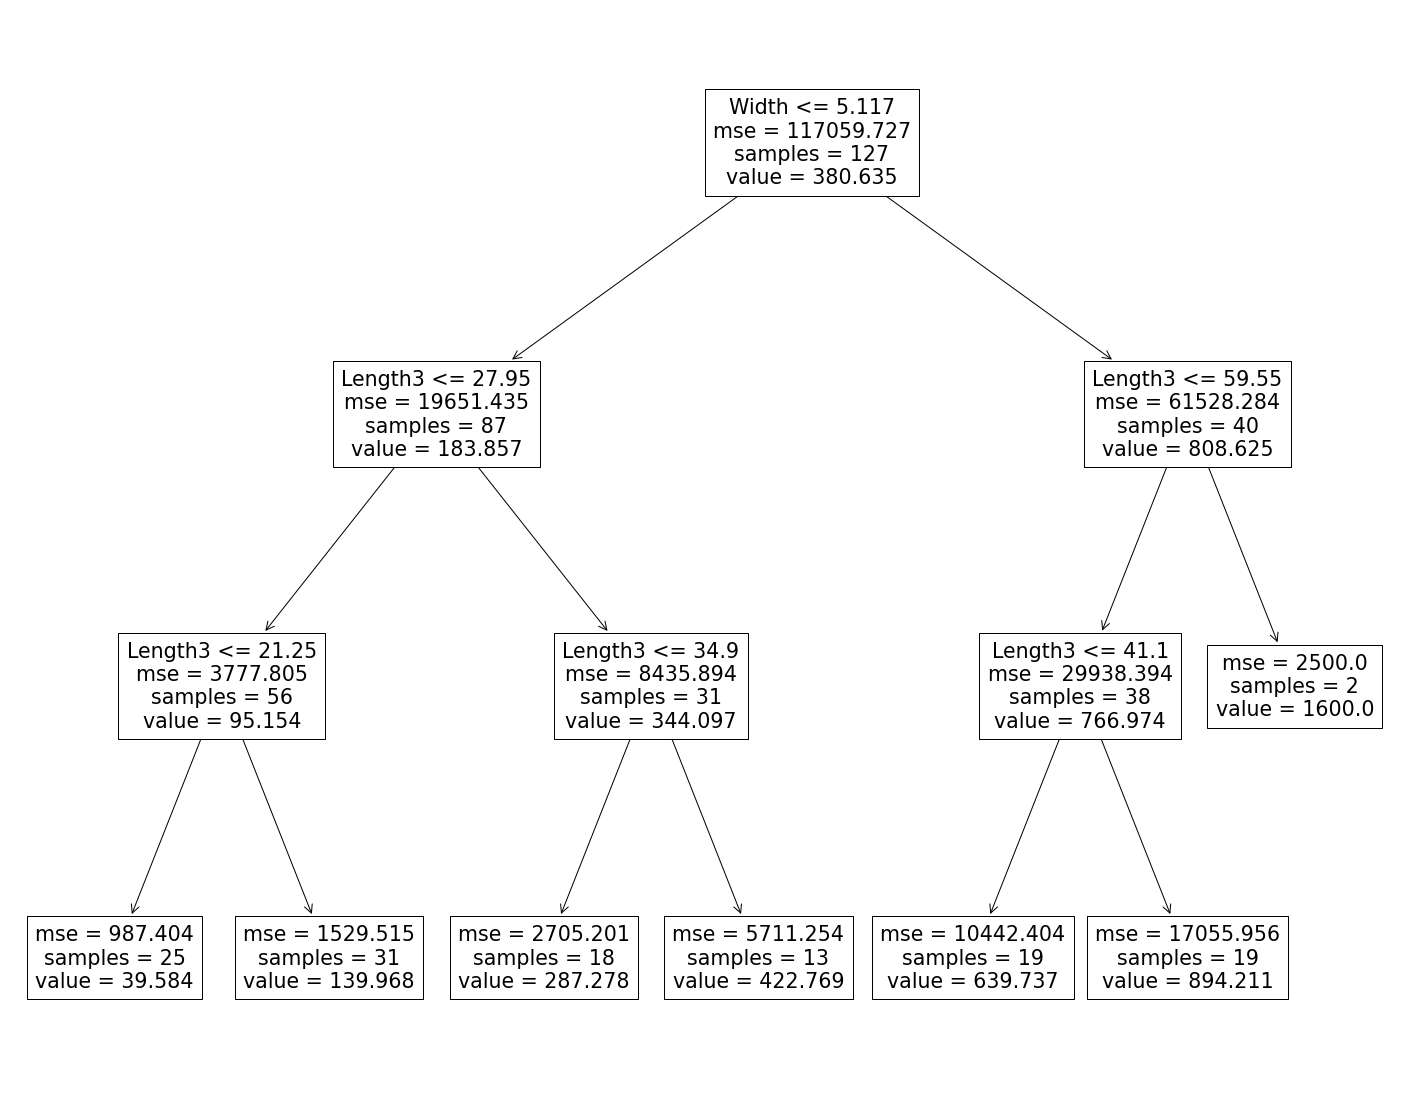

In [111]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree_picture= tree.plot_tree(reg_tree_model, feature_names=fish_market_num.columns, filled=False)

plt.savefig("Fig_regression_tree.png")

## 3. Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_model=RandomForestRegressor(n_estimators=50,max_depth=3)
rand_forest_model.fit(fish_market_num,fish_market_label)
predicted_weight_training_rf=rand_forest_model.predict(fish_market_num)
mse_train_rf=mean_squared_error(fish_market_label,predicted_weight_training_rf)

print('\nMean_squared_error on the training set using a random forest=',mse_train_rf)

# find the square root of the mean squared error
root_mean_squared_error_train_rf=np.sqrt(mse_train_rf)
print('\nRoot_mean_squared_error on the training set using a random forest=',
      root_mean_squared_error_train_rf)

predicted_weight_test_rf=rand_forest_model.predict(fish_market_num_test)

mse_test_rf=mean_squared_error(fish_market_label_test,predicted_weight_test_rf)
print('\nMean_squared_error on the test set using a random forest=',mse_test_rf)

root_mean_squared_error_test_rf=np.sqrt(mse_test_rf)
print('\nRoot_mean_squared_error on the test set using a random forest=',root_mean_squared_error_test_rf)

print('\n$R^2$ score=', r2_score(fish_market_label_test,predicted_weight_test_rf))


Mean_squared_error on the training set using a random forest= 2839.1621872100336

Root_mean_squared_error on the training set using a random forest= 53.28378915964999

Mean_squared_error on the test set using a random forest= 7332.124130524747

Root_mean_squared_error on the test set using a random forest= 85.62782334337798

$R^2$ score= 0.954734402199461


# Binary Classification Example Using A Logistic Regression Model. Data set: [MNIST](http://yann.lecun.com/exdb/mnist/). This data set is very popular and scikit-learn has a code to download it. Since this is binary classification only we will classify an image as being that of an 8 or not an 8. 

 > **Note: The MNIST data set is already split into 60,000 training instances (the first 60,000) and 10,000 testing instances (the last 10000). No need to split it manually.**

In [40]:
# Fetch the data 

from sklearn.datasets import fetch_openml

mnist_data=fetch_openml('mnist_784',version=1,data_home='Data_Sets')

In [77]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [43]:
mnist_data.url

'https://www.openml.org/d/554'

In [49]:
X,y_true=mnist_data['data'],mnist_data['target']
print(' Data without the target labels has shape:',X.shape)
print('\n Type of the data in each feature cell is: ',type(X[1,1]))
print('\n Target labels have shape: ',y_true.shape)
print('\n Type of the data in each label cell is: ',type(y_true[1,]))

 Data without the target labels has shape: (70000, 784)

 Type of the data in each feature cell is:  <class 'numpy.float64'>

 Target labels have shape:  (70000,)

 Type of the data in each label cell is:  <class 'str'>


In [50]:
# We need to change the labels from strings to floating points

y_true=y_true.astype(np.uint8)
print('\n Recheck the type of the data in each label cell: ',type(y_true[1,]))


 Recheck the type of the data in each label cell:  <class 'numpy.uint8'>


In [73]:
# Training and test subsets

X_train, X_test, y_true_train, y_true_test=X[0:59999,:],X[60000:70001,:],y_true[0:59999],y_true[60000:70001]

In [52]:
# For our binary classifier our target label is only 8:

y_true_train_8, y_true_test_8=(y_true_train==8), (y_true_test==8)

In [71]:
# Train our logistic regression model (this has cross validation built in within it)

from sklearn.linear_model import LogisticRegressionCV

clf_lr_model = LogisticRegressionCV(cv=5, random_state=0, max_iter=100)
clf_lr_model.fit(X_train, y_true_train_8)

# model accuracy on the whole training subset
clf_lr_model.score(X_train, y_true_train_8)

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.9517991966532775

# Performance measures for classification models:

1. **Accuracy**: Percentage of times prediction model got the classification right.

2. **Confusion matrix**: Counting all true positives, false positives, true negatives, and false negatives.

| True Negative  | False Positive|
| -----------    | -----------   |
| **False Negative**| **True Positive** |


3. **Precision score**: Accuracy of positive predictions:

$$Precision=\frac{\text{true positives}}{\text{all predicted positives}}=\frac{\text{true positives}}{\text{true positives}+\text{false positives}}$$

4. **Recall score**: Ratio of the positive instances that are correctly classified:

$$Recall=\frac{\text{true positives}}{\text{all positives labels}}=\frac{\text{true positives}}{\text{true positives}+\text{false negatives}}$$

5. **$F_1$ score**: Only high when both precision and recall scores are both high:

$$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$$

6. AUC (Area Under the Curve) and ROC (Receiver Operating Characteristics) curves: These curves provide a performance measure for a classification model at various threshold values.

In [54]:
# Let's use our trained model to make some predictions then evaluate it using different performance measures

from sklearn.model_selection import cross_val_predict

y_train_predict=cross_val_predict(clf_lr_model,X_train, y_true_train_8,cv=3)

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nelsonhy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

 Confusion matrix:
 [[52910  1239]
 [ 1916  3934]]

 Normalized confusion matrix:
 [[0.97711869 0.02288131]
 [0.32752137 0.67247863]]

 Precision score= 0.7604871447902571

 Recall score= 0.6724786324786325

 F1 score= 0.713780277601379


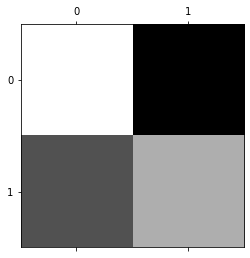

In [115]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score 

conf_matrix=confusion_matrix(y_true_train_8,y_train_predict)

# normalize the confusion matrix (divide the numbers by the row totals)
row_totals=conf_matrix.sum(axis=1,keepdims=True)
conf_matrix_normalized=conf_matrix/row_totals

print(' Confusion matrix:\n',conf_matrix)

print('\n Normalized confusion matrix:\n',conf_matrix_normalized)

plt.matshow(conf_matrix_normalized,cmap='gray')

plt.savefig('Fig_confusion_matrix_binary')

print('\n Precision score=',precision_score(y_true_train_8,y_train_predict))

print('\n Recall score=',recall_score(y_true_train_8,y_train_predict))

print('\n F1 score=',f1_score(y_true_train_8,y_train_predict))